# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
%time
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as datetime

# File to Load (Remember to change these)
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

CPU times: total: 0 ns
Wall time: 0 ns


### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(3)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban


In [3]:
# Convert the date column to datetime.
# This will allow to perform future calculations:
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'].str.strip(), format='%Y-%m-%d %H:%M:%S')

# Verify the column types:
pyber_data_df.dtypes

city                    object
date            datetime64[ns]
fare                   float64
ride_id                  int64
driver_count             int64
type                    object
dtype: object

## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
total_rides_per_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_per_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
driver_count_per_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count_per_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
total_fare_per_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_per_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride_per_city_type = total_fare_per_city_type / total_rides_per_city_type
average_fare_per_ride_per_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver_per_city_type = total_fare_per_city_type / driver_count_per_city_type
average_fare_per_driver_per_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame.
# Initialize an empty dataframe and add values to it
columns_to_create = ['City Type', 'Total Rides','Total Drivers','Total Fares','Average Fare per Ride','Average Fare per Driver']
pyber_summary_df = pd.DataFrame(columns = columns_to_create)
# Add records to dataframe using the .loc function
pyber_summary_df.loc[0] = ['Rural', total_rides_per_city_type[0], driver_count_per_city_type[0], total_fare_per_city_type[0], average_fare_per_ride_per_city_type[0], average_fare_per_driver_per_city_type[0]]
pyber_summary_df.loc[1] = ['Suburban', total_rides_per_city_type[1], driver_count_per_city_type[1], total_fare_per_city_type[1], average_fare_per_ride_per_city_type[1], average_fare_per_driver_per_city_type[1]]
pyber_summary_df.loc[2] = ['Urban', total_rides_per_city_type[2], driver_count_per_city_type[2], total_fare_per_city_type[2], average_fare_per_ride_per_city_type[2], average_fare_per_driver_per_city_type[2]]


pyber_summary_df = pyber_summary_df.set_index(['City Type'])
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
City Type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.head(3)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#fares_by_city_type_and_date = pyber_data_df.groupby(['type','date'])['fare'].sum()
fares_by_city_type_and_date_df = pyber_data_df.groupby(['type','date']).sum()[["fare"]]
fares_by_city_type_and_date_df.head(3)

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_city_type_and_date_df = fares_by_city_type_and_date_df.reset_index()
fares_by_city_type_and_date_df.head(3)

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_city_type_and_date_pivot_df = fares_by_city_type_and_date_df.pivot(index='date', columns='type', values='fare')
fares_by_city_type_and_date_pivot_df.tail(3)

type,Rural,Suburban,Urban
date,,,
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77
2019-05-08 13:10:18,NaN,NaN,18.04


In [16]:
## INPUT CHECKPOINT: Verify the number of rows of the input DF
fares_by_city_type_and_date_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
filter_by_date_df = (fares_by_city_type_and_date_pivot_df.index >= '2019-01-01 00:00:00') & (fares_by_city_type_and_date_pivot_df.index <= '2019-04-28 23:59:59')
fares_by_city_type_and_date_pivot_filtered_df = fares_by_city_type_and_date_pivot_df.loc[filter_by_date_df]
fares_by_city_type_and_date_pivot_filtered_df.tail(3)

type,Rural,Suburban,Urban
date,,,
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [18]:
## OUTPUT CHECKPOINT: Verify the number of rows of the input DF
fares_by_city_type_and_date_pivot_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
## NOTE: I can skip this step because I did it earlier in the code.

In [20]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_by_city_type_and_date_pivot_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [21]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = fares_by_city_type_and_date_pivot_filtered_df.resample('W').sum()
weekly_fares_df.head(3)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02


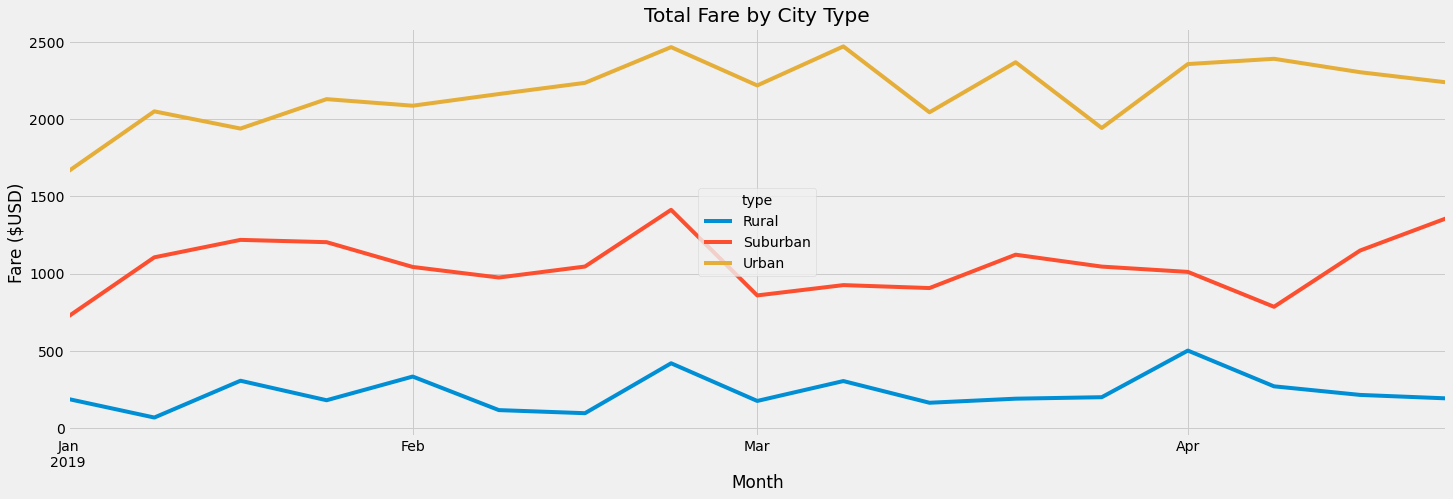

In [51]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

my_plot = weekly_fares_df.plot(figsize = (22,7))
my_plot.set_title("Total Fare by City Type")
my_plot.set_xlabel("Month")
my_plot.set_ylabel("Fare ($USD)")
plt.show()